In [1]:
import pandas as pd
from  sympy import *
import math 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy
import scipy.io as sio
import time
import scipy
import random 

In [2]:
dataset1 = sio.loadmat(r'ex7data1.mat')
dataset2 = sio.loadmat(r'ex7data2.mat')

In [3]:
#X = dataset1['X']
X = dataset2['X']

In [4]:
def kMeansInitCentroids(X,K):
    
    centroids = []
        
    for i in range(K):
        
        num = random.randint(0,X.shape[0])

        centroids.append(X[num])  
        
        np.delete(X,num , axis = 0)
    
    return np.asarray(centroids)

In [5]:
def findClosestCentroid(X, centroids): 
    
    distances = []
    
    for i in range(len(centroids)):
        
        distances.append(((np.sum(((X-centroids[i])**2),axis = 1)**0.5)))
        
        
    distances = np.asarray(distances)
    
    distances = distances.T

    closest_centroids = np.argmin(distances, axis=1)  
    
    return closest_centroids

In [6]:
def computeMeans(X,idx,K):
    
    centroids = []
    
    for i in range(K):
    
        temp_array = X[np.where(idx == i)]

        centroids.append(np.mean(temp_array, axis = 0))   
    
    return np.asarray(centroids)

In [7]:
K = 3

centroids = kMeansInitCentroids(X,K)

iterations = 1000
    
for iteration in range(iterations):
    
    idx = findClosestCentroid(X, centroids)
        
    centroids = computeMeans(X, idx, K)    

In [8]:
x1 = X[:,0]
x2 = X[:,1]

In [9]:
x = centroids[:,0]
y = centroids[:,1]

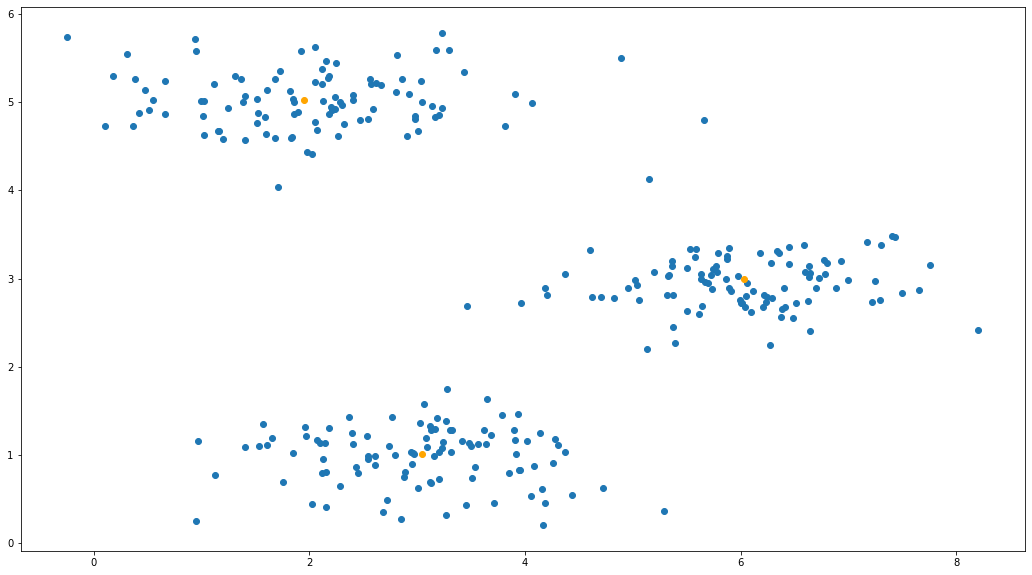

In [11]:
fig, ax = plt.subplots()

plt.scatter(x1,x2)
plt.scatter(x,y, c = 'orange')


fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.xticks(rotation=0)
plt.show()

## K means on pixles

In [70]:
mat2 = sio.loadmat("bird_small.mat")
A = mat2["A"]

In [71]:
X = (A/255).reshape(128*128,3)

In [72]:
X.shape

(16384, 3)

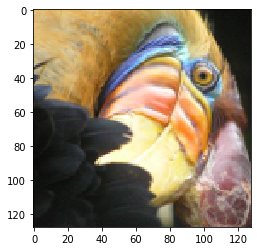

In [73]:
import matplotlib.image as mpimg
fig, ax = plt.subplots()
ax.imshow(X.reshape(128,128,3));

In [74]:
K = 16

centroids = kMeansInitCentroids(X,K)


iterations = 1000

for iteration in range(iterations):
    
    idx = findClosestCentroid(X, centroids)
        
    centroids = computeMeans(X, idx, K)    

In [75]:
centroids

array([[0.34599994, 0.31612866, 0.32617519],
       [0.56853371, 0.72011562, 0.86796344],
       [0.47637851, 0.34588885, 0.18210378],
       [0.86525067, 0.71428604, 0.45362329],
       [0.97710413, 0.94574574, 0.81667021],
       [0.67131773, 0.48546986, 0.21386918],
       [0.70699114, 0.63431493, 0.56121631],
       [0.82798338, 0.74688352, 0.73709908],
       [0.39395716, 0.4638476 , 0.64303956],
       [0.626546  , 0.53472629, 0.445657  ],
       [0.51412057, 0.42148083, 0.37001268],
       [0.14375471, 0.14987038, 0.14149463],
       [0.963341  , 0.85796999, 0.62937046],
       [0.08067187, 0.08741448, 0.07705889],
       [0.2498121 , 0.22361509, 0.21135191],
       [0.8344337 , 0.59878651, 0.29884821]])

In [76]:
new_X = np.asarray([centroids[i] for i in idx])

In [77]:
compressed_X = new_X.reshape((128,128,3))
X = (A/255).reshape(128,128,3)

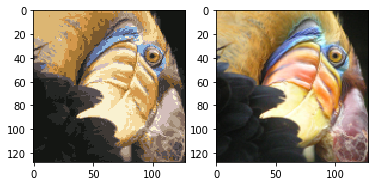

In [78]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(1,2)
ax[0].imshow(compressed_X);
ax[1].imshow(X);